## Ungraded lab: Improving Computer Vision Accuracy using Convolutions

### Convolutional Neural Network 

In [16]:
import tensorflow as tf 

In [17]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

#Normalize the data 
training_images = training_images/255.0
test_images = test_images / 255.0

In [25]:
# Define the model 
model = tf.keras.models.Sequential([ 
    # Add convolutions and max pooling 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),

    #Add the same layers as earlier
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use the same settings 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model 
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 10816)             0         
                                                                 
 dense_13 (Dense)            (None, 128)               1384576   
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
____________________________________________

Let's quickly look at the new code... Instead of the input layer at the top we added a Conv2Dlayer. The parameters are: 

1. The number o f convolutions we want to generate - the value here is purely arbitrary, but it's good to use powers of 2 starting from 32

2. The size of the Convolution. In this case a 3x3 grid

3. The activation function to use

4. In the first layer, the shape of the input data

We'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the featues that were highlighted by convolution. 

By specifying (2,2) for the MaxPooling the effect is to quarter the size of the image

We can call model.summary() to see the size and shape of the network and we'll notice that after every max pooling layer the image size is reduced in this way

Then we added another convolution and flattened the output 

After this we'll just have the same DNN structure as the non convolutional version. The same 128 dense layers and 10 output layers as in the pre-convolution example:

### About overfitting 

Overfitting occurs when the network learns the data from the training set really well, but it's too specialized to only that data, and as a result is less effective at interpreting other unseen data. 

## Visualizing the Convolutions and Pooling 

Let's explore how to show the convolutions graphically


In [23]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 16ms/step


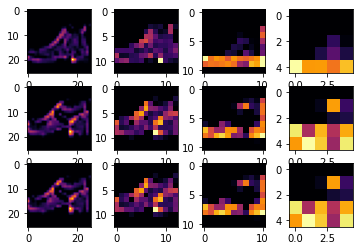

In [24]:
import matplotlib.pyplot as plt 
from tensorflow.keras import models 

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23 
THIRD_IMAGE=28 
CONVOLUTION_NUMBER=1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)



#### Exercises

1. Try editing the convolutions - what impact will this have on accuracy and/or training time
    - with higher number convolutions, training time will go up but accuracy is likely to go up too

2. Remove the final convolution, what impact will this have on accuracy or training time?
    - Seems like training time increases slightly while accuracy seems to drop!

3. How about adding more Convolutions?
    - Training goes up, this seems logical as a result of a deeper/more complex network, and accuracy seems to increase slightly as well for this data!

4. Remove all convolutions but the first, what impact do you think this will have?
    - In this case training went down slightly (as expected due to a less complex network), but it also seems that accuracy actually went up slightly: This is a bit surprising as I would have expected accuracy to fall with a less complex network! 

5. Try to implement af callback function to stop training when hitting a particular amount

In [37]:
#Q5 above - implement callback 

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.5):
            print(f"Loss is lower than {0.5} so cancelling training")
            self.model.stop_training = True 

# Instantiate class 
callbacks = myCallback()



In [38]:
# Define the model 
model = tf.keras.models.Sequential([ 
    # Add convolutions and max pooling 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Add the same layers as earlier
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use the same settings 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model 
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 64)       